# Principle Component Analysis (PCA) 

###### Importing Libraries 

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import ndimage # for rotating image
%matplotlib inline

###### Loading the data 

Text(0.5,1,'Original Data')

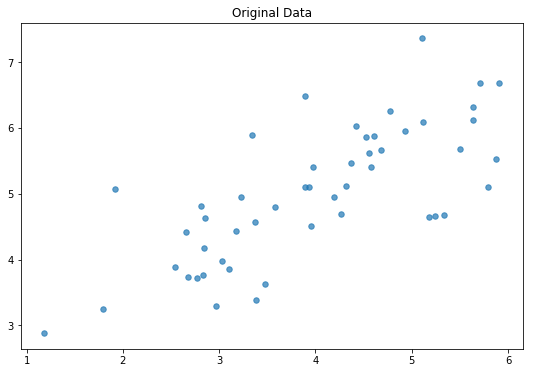

In [15]:
data = loadmat('ex7data1.mat')
X = data['X']

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(X[:,0], X[:,1], s=30, alpha=0.7)
ax.set_title("Original Data")

###### Defining PCA functions 

In [16]:
def pca(X):
    
    # normalize the features
    X = (X - X.mean())/ X.std()
    
    # Covariance matrix
    X = np.matrix(X)
    cov = (X.T * X)/ X.shape[0]
    
    # Performing SVD
    U, S, V = np.linalg.svd(cov)
    
    return U, S, V

U, S, V = pca(X)
U, S, V

(matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]),
 array([1.43584536, 0.56415464]),
 matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]))

###### Projecting the data 

In [17]:
def projectData(X, U, k):
    reducedU = U[:,:k]
    
    return np.dot(X, reducedU)

Z = projectData(X, U, 1)
Z

matrix([[-4.74689738],
        [-7.15889408],
        [-4.79563345],
        [-4.45754509],
        [-4.80263579],
        [-7.04081342],
        [-4.97025076],
        [-8.75934561],
        [-6.2232703 ],
        [-7.04497331],
        [-6.91702866],
        [-6.79543508],
        [-6.3438312 ],
        [-6.99891495],
        [-4.54558119],
        [-8.31574426],
        [-7.16920841],
        [-5.08083842],
        [-8.54077427],
        [-6.94102769],
        [-8.5978815 ],
        [-5.76620067],
        [-8.2020797 ],
        [-6.23890078],
        [-4.37943868],
        [-5.56947441],
        [-7.53865023],
        [-7.70645413],
        [-5.17158343],
        [-6.19268884],
        [-6.24385246],
        [-8.02715303],
        [-4.81235176],
        [-7.07993347],
        [-5.45953289],
        [-7.60014707],
        [-4.39612191],
        [-7.82288033],
        [-3.40498213],
        [-6.54290343],
        [-7.17879573],
        [-5.22572421],
        [-4.83081168],
        [-7

###### We can also recover the original data from reduced one 

In [18]:
def recoveredData(Z, U, k):
    reducedU = U[:, :k]
    
    return np.dot(Z, reducedU.T)

recoveredX = recoveredData(Z, U, 1)
recoveredX

matrix([[3.76152442, 2.89550838],
        [5.67283275, 4.36677606],
        [3.80014373, 2.92523637],
        [3.53223661, 2.71900952],
        [3.80569251, 2.92950765],
        [5.57926356, 4.29474931],
        [3.93851354, 3.03174929],
        [6.94105849, 5.3430181 ],
        [4.93142811, 3.79606507],
        [5.58255993, 4.29728676],
        [5.48117436, 4.21924319],
        [5.38482148, 4.14507365],
        [5.02696267, 3.8696047 ],
        [5.54606249, 4.26919213],
        [3.60199795, 2.77270971],
        [6.58954104, 5.07243054],
        [5.681006  , 4.37306758],
        [4.02614513, 3.09920545],
        [6.76785875, 5.20969415],
        [5.50019161, 4.2338821 ],
        [6.81311151, 5.24452836],
        [4.56923815, 3.51726213],
        [6.49947125, 5.00309752],
        [4.94381398, 3.80559934],
        [3.47034372, 2.67136624],
        [4.41334883, 3.39726321],
        [5.97375815, 4.59841938],
        [6.10672889, 4.70077626],
        [4.09805306, 3.15455801],
        [4.907

###### Plotting the recovered Data 

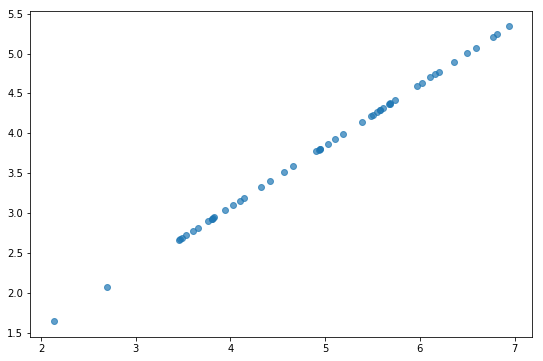

In [28]:
fig, ax = plt.subplots(figsize=(9, 6))  
ax.scatter([recoveredX[:, 0]], [recoveredX[:, 1]], alpha = 0.7)  


All points seems to have compressed down to a single line.

## PCA to images of faces 

###### Loading Data 

In [30]:
faces = loadmat('ex7faces.mat')
X = faces['X']
X.shape

(5000, 1024)

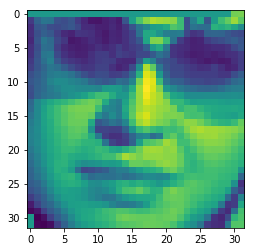

In [59]:
face = np.reshape(X[12,:], (32, 32)) # 32, 32 because we can divide 1024 only in 32 x 32
rotated_img = ndimage.rotate(face,-90)
plt.imshow(rotated_img)

In [60]:
U, S, V = pca(X)
Z = projectData(X, U, 100)

Now, recover the data from this reduced matrices

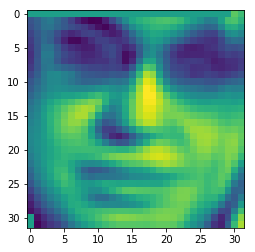

In [61]:
recoveredX = recoveredData(Z, U, 100) # Reducing data by 10x
face = np.reshape(recoveredX[12,:], (32, 32))
rotated_img = ndimage.rotate(face,-90)
plt.imshow(rotated_img)